In [ ]:
!pip install multidict
!pip install -U spacy
!python -m spacy download fr_core_news_sm


     |████████████████████████████████| 94 kB 2.0 MB/s 
     |████████████████████████████████| 6.0 MB 5.3 MB/s 
     |████████████████████████████████| 42 kB 1.5 MB/s 
     |████████████████████████████████| 628 kB 45.1 MB/s 
     |████████████████████████████████| 10.1 MB 27.9 MB/s 
     |████████████████████████████████| 181 kB 40.5 MB/s 
     |████████████████████████████████| 451 kB 45.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled sp

In [ ]:
!pip install spacy-langdetect

     |████████████████████████████████| 998 kB 5.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-py3-none-any.whl size=993431 sha256=ef0f1c44844cf6f2393634d13257b43fd3bc130d3837e50d9ba66592f4c95943
  Stored in directory: /root/.cache/pip/wheels/89/79/3b/9885ae7f4308f73c514f96d8574d40d7d8173a27731b674013
Successfully built langdetect


In [ ]:
!python -m spacy download fr_dep_news_trf

     |████████████████████████████████| 400.7 MB 24 kB/s 
     |████████████████████████████████| 1.2 MB 5.2 MB/s 
     |████████████████████████████████| 51 kB 121 kB/s 
     |████████████████████████████████| 1.1 MB 33.4 MB/s 
     |████████████████████████████████| 3.4 MB 33.4 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 3.3 MB 37.2 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 895 kB 48.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
✔ Download and installation successful
You can now load the package via spacy.load('fr_dep_news_trf')


----
## Ne pas oublier de relancer l'environnement
----

In [ ]:
# Il faut initialiser le dossier à partir de GitHub
# cette action est à faire une seule fois lors de la première utilisation
!git clone https://github.com/Patent2net/LexiComWebPartners.git

fatal: destination path 'LexiComWebPartners' already exists and is not an empty directory.


In [ ]:
!git clone https://github.com/Patent2net/LexiComWeb.git

Cloning into 'LexiComWeb'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 76 (delta 11), reused 73 (delta 8), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [ ]:
stockageEntree = "/content/LexiComWeb/"
stockageEntreePartners = "/content/LexiComWebPartners/"
stockageSortie = "/content/LexiComWebPartners/"

In [ ]:
import os, urllib
os.chdir('/content/LexiComWeb/RESSOURCES/')
from outils import isPartner


---
# Personnalisation (Option)

> Ces cellules permettent de réaliser les traitements à partir de son propre espace de stockage. A n'exécuter que dans ce cas en adaptant les dossiers d'entrée et sortie. NE PAS EXECUTER SAUF A VOULOIR PERSONNALISER LES TRAITEMENTS.

Si vous avez exécuté le scraper et reconstitué l'ensemble des dossiers nécessaires sur votre drive, ces cellules vous permettent de configurer ce notebook pour travailler sur vos données et non celles issues du git (accessibles sur un dossier virtuel via le menu *Fichiers* à gauche).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Récupérer les sorties sur son drive (créer un dossier "OUT")
stockageSortie = "/content/drive/MyDrive/OUT"

In [ ]:
# Récupérer les entrées sur son drive
stockageEntree = "/content/drive/MyDrive/OUT"

> Le dossier OUT sur votre drive doit contenir la même arborescence que le dossier virtuel DistorsionCom : le code n'inclut pas la création de cette structure.

---

# Prétraitements 

## Détection de langue
> Les procédures de lemmatisation et autres fonctions TAL sont fonction de la langue. Seul le modèle FR est chargé. Les autres langues seront exclues.

In [ ]:
import multidict as multidict
import os, json, re, spacy
from os import path
from collections import Counter
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import pandas as pd
from urllib import parse


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [ ]:
# A ne pas lancer plusieurs fois !!
Language.factory("language_detector", func=get_lang_detector)

<function __main__.get_lang_detector>

In [ ]:
  # deux modèles de données spacy seront utilisés du fait de leur efficacité relative à la détection des entités
    # 'fr_core_news_sm' fonctionne mieux pour la détection des entités
tal = spacy.load('fr_core_news_sm')


In [ ]:
tal.add_pipe('language_detector', last=True) # Permet de détecter la langue

In [ ]:
aGarder, aVirer = dict([]), dict([])

In [ ]:
# modif au 30/11 
fichierEntree = stockageEntreePartners + "/ContenusPartners/Partners.json"
with open (fichierEntree, 'r', encoding = 'utf8') as  fictemp:
  soupe = json.load(fictemp)
ndf = "Partners"
aVirer = []
aGarder = []
for url in soupe.keys():
  tousLesContenus = soupe [url] 
  doc = tal(str(tousLesContenus))
  if not doc._.language["language"] == "fr": # exclusion si fr non détecté
    print("pas fr (ou vide) : ", url, soupe [url] )
    aVirer.append(url)
  else:
    aGarder.append(url)

pas fr (ou vide) :  http://browsehappy.com Browse Happy        Browse Happy  Online. Worry-free. Upgrade your browser today !         Google Chrome  “Get more done with the new Google Chrome. A more simple, secure, and faster web browser than ever, with Google's smarts built-in.”  Latest Version: 97  Visit website for more info       Mozilla Firefox  “Faster page loading, less memory usage and packed with features, the new Firefox is here.”  Latest Version: 96  Visit website for more info       Safari  “Safari is faster and more energy efficient than other browsers. You can shop safely and simply in Safari on your Mac.”  Latest Version: 15.2  Visit website for more info       Opera  “Opera is a secure, innovative browser used by millions around the world with a built-in ad blocker, free VPN, and much more - all for your best browsing experience.”  Latest Version: 83  Visit website for more info       Microsoft Edge  “Microsoft Edge offers world-class performance with more privacy, more

## Suppression des doublons
> affectation sur taille DNS la plus courte

In [ ]:
indexTempo = []
DejaVus = []

In [ ]:
for url in soupe.keys():
  if url not in DejaVus:
    urlP = parse.urlparse(url)
    if 'http' in urlP.scheme:
      if 'www' in urlP.hostname:
        v1 = urlP.scheme + '://' + urlP.hostname.replace("www.", "")
        v2 = urlP.scheme + '://' + urlP.hostname
        v3 = 'https://' + urlP.hostname
        v4 = 'https://' + urlP.hostname.replace("www.", "")
      else:
        v1 = urlP.scheme + '://' + urlP.hostname
        v4 = urlP.scheme + '://www.' + urlP.hostname
        v3 = 'https://' + urlP.hostname
        v2 = 'https://' + urlP.hostname.replace("www.", "")
    else:
      if 'www' in urlP.hostname:
        v3 = urlP.scheme + '://' + urlP.hostname
        v4 = urlP.scheme + '://www.' + urlP.hostname
        v2 = 'http://' + urlP.hostname
        v1 = 'http://' + urlP.hostname.replace("www.", "")
      else:
        v2 = urlP.scheme + '://' + urlP.hostname
        v4 = urlP.scheme + '://www.' + urlP.hostname
        v1 = 'http://' + urlP.hostname
        v3 = 'http://www.' + urlP.hostname
    DejaVus.append(v1)
    DejaVus.append(v2)
    DejaVus.append(v3)
    DejaVus.append(v4)
  if "facebook" not in url and "twitter" not in url and "instagram" not in url:
    if v1 in soupe.keys():
      indexTempo.append(v1)
    elif v2 in soupe.keys():
      indexTempo.append(v2)
    elif v3 in soupe.keys():
      indexTempo.append(v3)
    elif v4 in soupe.keys():
      indexTempo.append(v4)
    else:
      pass # url pas dans les collectés on l'ignore

indexTempo = list(set(indexTempo))

In [ ]:
print(indexTempo)

['https://guadeloupe-parcnational.fr', 'http://calanques-parcnational.fr', 'http://var.fr', 'http://silene.eu', 'http://bateaux-taxi.com', 'https://lesbateliersdelarade.com', 'https://espaces-naturels.fr', 'http://cbnmed.fr', 'http://calameo.com', 'https://villanoailles-hyeres.com', 'http://visitvar.fr', 'https://goo.gl', 'https://calameo.com', 'http://guadeloupe-parcnational.fr', 'https://vedettesilesdor.fr', 'https://addtoany.com', 'http://adeo-web.fr', 'http://www.var.gouv.fr', 'http://echosciences-paca.fr', 'https://igesa.fr', 'https://latitudeverte.fr', 'http://mercantour.eu', 'http://espritparcnationalportcros.com', 'https://ecrins-parcnational.fr', 'https://cevennes-parcnational.fr', 'https://medpan.org', 'https://iucncongress2020.org', 'http://tlv-tvm.com', 'https://ecologique-solidaire.gouv.fr', 'http://provence-alpes-cotedazur.com', 'http://alizee-soft.com', 'http://reseaumer.org', 'http://reseaumistral.com', 'http://latitudeverte.fr', 'http://www.wixsite.com', 'http://iucnco

In [ ]:
index2 = []
DejaVus = []

In [ ]:
for url in indexTempo:
  if url not in DejaVus:
    tempo = [url2 for url2 in soupe.keys() if soupe [url2] == soupe [url]]
    DejaVus .extend(tempo)
    zoneDnsMini = min([len(url) for url in tempo])

    index2.append([url3 for url3 in tempo if len(url3) == zoneDnsMini][0])


In [ ]:
print (len (index2))

84


In [ ]:
for url in index2:
  if url in aVirer:
    index2 .remove(url)
print (len (index2))

71


> index2 contient les partenaires avec un contenu fr (probablement mais pas sûr à 100%) récupéré

> distribution des tailles de site

## Supression des extrêmes


In [ ]:
aGarderTemp, aVirerTemp = aGarder, aVirer



---


Ne pas exécuter la ligne ci-dessous. Sauvegarde temporaire pour ne pas avoir à rexécuter la précédente lors des tests.

In [ ]:
# aGarder, aVirer = aGarderTemp, aVirerTemp



---



> l'ensemble de la collecte initiale (liste Hyphe augmentée des déclinaisons DNS) excluant les "pas corrects"

In [ ]:
stats = dict()
index = list([url for url in soupe.keys() if url not in aVirer and url in aGarder])

data  = [len(soupe[url]) for url in index ]
donnees = pd.DataFrame.from_dict(data)
donnees.index = index
donnees.columns=["taille"]
stats  = donnees.describe()

 # stats contient la description statistique des données fondée sur la taille
 # de celle-ci. Cette variable servira a exclure les url dont la variation
 # à la moyenne est trop importante : trop ou pas assez sont considérés comme
 # des singularités. Cela peut provenir de la forme choisie pour la page (grande
 # page qui contient "tout" avec un ascenceur interminable ou par ex. une page composée
 # par des appels url en js que le collecteur ne reconstruit pas) 

In [ ]:
soupe ["http://portcros-parcnational.fr"]

'Parc national de Port-Cros et Porquerolles |     Aller au contenu principal                Toggle navigation       Le Parc national de Port-Cros  Le Parc national en bref   L\'établissement public   La réglementation   La charte   Marchés publics   Offres d\'emploi   Recueil des actes administratifs   Le magazine du Parc national            Toggle navigation      Les parcs nationaux de France Parc national de la Vanoise  Parc national de Port-Cros  Parc national des Pyrénées  Parc national des Cévennes  Parc national des Ecrins  Parc national du Mercantour  Parc national de la Guadeloupe  Parc amazonien de Guyane  Parc national de La Réunion  Parc national des Calanques  Parc national de Forêts  Portail des parcs nationaux de France  Office français de la biodiversité                                Parc national de Port-Cros et Porquerolles         Toggle navigation         Des découvertes Faites de rencontres & d\'émotions   Une destination d\'exception   Les trois îles  Le littoral 

In [ ]:
donnees .describe()

,taille
count,248.000000
mean,7581.185484
std,7332.543251
min,43.000000
25%,3262.000000
50%,6159.000000
75%,9898.000000
max,40301.000000


In [ ]:
tempo = donnees ['taille'] .value_counts() 

## Nouvelles stats

In [ ]:
aVirer .append('http://portcrosparcnational.fr')

In [ ]:
index = list([url for url in index2 if url not in aVirer and url in aGarder])

data  = [len(soupe[url]) for url in index ]
donnees = pd.DataFrame.from_dict(data)
donnees.index = index
donnees.columns=["taille"]
stats  = donnees.describe()

In [ ]:
tempo = donnees ['taille'] .value_counts() 

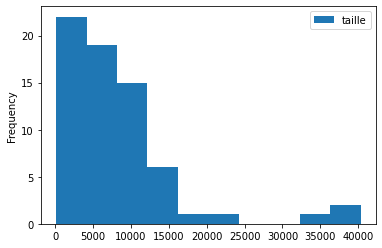

In [ ]:
donnees.plot.hist(bins=10)

In [ ]:
donnees2 = donnees [donnees ['taille']>500] # supression des petits sites

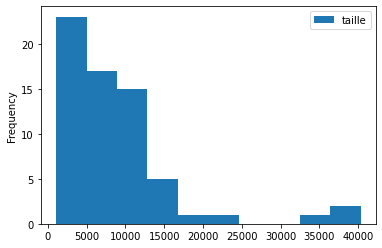

In [ ]:
donnees2.plot.hist(bins=10)

In [ ]:
supprimés = donnees [donnees ['taille']<=500]

In [ ]:
index = list([url for url in donnees2 .index if url not in aVirer and url in aGarder])

data  = [len(soupe[url]) for url in index ]
donnees = pd.DataFrame.from_dict(data)
donnees.index = index
donnees.columns=["taille"]
stats  = donnees.describe()

In [ ]:
stats

,taille
count,65.000000
mean,8786.938462
std,7696.444406
min,1083.000000
25%,3849.000000
50%,6916.000000
75%,11122.000000
max,40301.000000


In [ ]:
Partners = dict()
for url in soupe.keys():
  if url in index:
    test = [len(mot) for mot in soupe [url].split()]
    if max (test) > 80: #un mot de 80 caractères c'est louche
      print (url)
      test = [mot for mot in soupe [url].split() if len(mot)>50]
      print (test)
    else:
      Partners [url] = soupe [url]

https://www.marches-publics.gouv.fr
['id="ctl0_CONTENU_PAGE_rechercheRapideCons_subitemRadioGroup"', 'id="ctl0_CONTENU_PAGE_rechercheRapideCons_itemRadioGroup"', 'for="ctl0_CONTENU_PAGE_rechercheRapideCons_categorie">Catégorie', 'name="ctl0$CONTENU_PAGE$rechercheRapideCons$categorie"', 'id="ctl0_CONTENU_PAGE_rechercheRapideCons_categorie"', 'for="ctl0_CONTENU_PAGE_rechercheRapideCons_motsCle">Mots', 'name="ctl0$CONTENU_PAGE$rechercheRapideCons$motsCle"', 'name="ctl0$CONTENU_PAGE$rechercheRapideCons$lancerRecherche"', 'id="ctl0_CONTENU_PAGE_rechercheRapideCons_lancerRecherche"', 'onclick="selectAllLocalisationsItems(\'listeLocalisationsSelect\');"', 'href="?page=Entreprise.EntrepriseAdvancedSearch&amp;searchAnnCons">', 'href="?page=Entreprise.EntrepriseAdvancedSearch&searchAnnCons&type=restreinte">', 'href="?page=Entreprise.EntrepriseAdvancedSearch&AllCons">', 'href="?page=Entreprise.EntrepriseAdvancedSearch&AllAnn">', 'for="listeLocalisationsSelect">@@RECHERCHE_RAPIDE_MA_SELECTION_ACTU

In [ ]:
fichierDeSortie = stockageSortie + "/ContenusPartnersTraites/PartnersNettoyes.json"
with open (fichierDeSortie, 'w', encoding ='utf8') as  fictemp: #on met tous les contenus dans pickle
  json.dump(Partners, fictemp)


In [ ]:
fichierDeSortie = stockageSortie + "/ContenusPartnersTraites/stats.json"

In [ ]:
donnees .to_json(fichierDeSortie)



---



# Traitement des données des sites partenaires


> Les partenaires sont les sites cités par le site d'origine, citant eux-même le site. Les motivations de citation étant aussi variées que les motivations de partenariat nous tentons de regrouper ces partenaires selon les catégories identifiées.

Les sites des partenaires ont été identifiés par le logiciel Hyphe (Médialab)

Note: si l'url n'a pas été collecté dans la phase d'initialisation (scrapping) alors son champ lexical n'est pas utilisé

In [ ]:
dicoEtiquettage = dict()
aEviter = dict()
verbes = dict() #listes à remplir avec verbes/adj/noms/entités trouvés 
adjectifs  = dict() 
noms = dict()

adverbes = dict()


In [ ]:
  tal = spacy.load('fr_core_news_sm')
    # 'fr_dep_news_trf' fonctionne mieux pour le reste
  tal1 = spacy.load('fr_dep_news_trf', disable = ['tagger', 'parser', 'textcat'])

In [ ]:
dicoEtiquettage, aEviter, catGramm = dict(), dict(), dict()

In [ ]:
for url in Partners.keys():
  doc = tal (Partners [url])
  dicoEtiquettage[url] = dict()

  entites = []
  for entity in doc.ents:
    if entity.label_ not in dicoEtiquettage[url].keys():
        dicoEtiquettage[url][entity.label_] = []
        dicoEtiquettage[url][entity.label_].append(entity.text)
        entites.append(entity.label_)
    else:
        dicoEtiquettage[url][entity.label_].append(entity.text)
      #entites.append(entity.text)
      #dicoEtiquettage [url] [entity.label_] = entites #dico: [étiquettage de entité donné par spacy] = la liste des entités
  if url not in aEviter.keys():
      aEviter[url] = []
  if 'LOC' in dicoEtiquettage[url].keys():
      aEviter[url] += dicoEtiquettage[url]['LOC']
  if 'MISC' in dicoEtiquettage [url].keys():
      aEviter[url] += dicoEtiquettage[url]['MISC']
  if 'PER' in dicoEtiquettage [url].keys():
      aEviter[url] += dicoEtiquettage [url]['PER']
  if 'ORG' in dicoEtiquettage [url].keys():
      aEviter[url] += dicoEtiquettage[url]['ORG']


  # utilisation de l'autre modèle
  doc = tal1(Partners [url].lower())

  if url not in verbes.keys():
        verbes[url] = []
  if url not in adjectifs.keys():
        adjectifs[url] = []
  if url not in noms.keys():
        noms[url] = []
  if url not in adverbes.keys(): #ADVERBES
        adverbes[url] = []
  for truc in doc: 
    if truc.text not in aEviter[url] and truc.text.lower() not in aEviter[url]: 
      if len(truc.text)>2:

            if truc.pos_ == "VERB":
              verbes[url].append(truc.lemma_) #ajoute à la liste (.lemma_ fait la lemmatisation)
              dicoEtiquettage[url][truc.pos_] = verbes[url] #ajoute dans le dico: ["VERB"] = la liste des verbes
            if truc.pos_ == "ADJ":
              adjectifs[url].append(truc.lemma_) 
              dicoEtiquettage [url][truc.pos_] = adjectifs[url] #dico:["ADJ"] = la liste des adjectifs
            if truc.pos_ == "NOUN":
              noms[url].append(truc.lemma_)
              dicoEtiquettage[url][truc.pos_] = noms[url] #dico: ["NOUN"] = la liste des noms  
            
            if truc.pos_ == "ADV": 
              adverbes[url].append(truc.lemma_)
              dicoEtiquettage[url][truc.pos_] = adverbes[url] #dico: ["ADV"] = la liste des adverbes
  catGramm [url] = dict()

  for cle in dicoEtiquettage[url]: 
    catGramm [url][cle] = Counter(dicoEtiquettage[url][cle])
 
    

In [ ]:
print(catGramm[url])

{'LOC': Counter({'Porquerolles': 9, 'Accueil': 1, 'Ile de Porquerolles': 1, 'Parc national': 1, 'Découvrez': 1, 'Mentions': 1}), 'MISC': Counter({'COPAINS    ': 1, 'Espaces naturels': 1, 'Nos produits bio   ': 1, 'Particuliers  ': 1, 'COPAINS': 1}), 'PER': Counter({'Porquerollais  Conditions de Livraison    ': 1, 'Sélectionner': 1, 'Solidaire': 1, 'Adopter': 1}), 'ORG': Counter({'TTC': 8, 'Article': 1, 'Forêts Varoises Sauvegarde': 1, 'Forêts Varoises': 1, 'Une Economie Sociale': 1}), 'NOUN': Counter({'ttc': 8, 'produit': 5, 'service': 4, 'espace': 4, 'emploi': 4, 'sauvegarde': 3, 'projet': 3, 'partenaire': 3, 'environnement': 3, 'préservation': 3, 'caviar': 3, 'aubergine': 3, 'copain': 2, 'propreté': 2, 'nettoyage': 2, 'plage': 2, 'agenda': 2, 'forêt': 2, 'développement': 2, 'territoire': 2, 'figuier': 2, 'mûrier': 2, 'entretien': 2, 'évènement': 2, 'chutney': 2, 'figue': 2, 'accueil': 1, 'foret': 1, 'propos': 1, 'panier': 1, 'condition': 1, 'livraison': 1, 'particulier': 1, 'entrepri

# Sauvegarde des traitements

In [ ]:
fichierDeSortie = stockageSortie + "/ContenusPartnersTraites/EtiquettesPartners.json"
with open (fichierDeSortie, 'w', encoding = 'utf8') as  fictemp: #on met tous les contenus dans un json
  json.dump(dicoEtiquettage, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/ContenusPartnersTraites/' +"verbesSitesPartners.json"
with open (fichierDeSortie, 'w', encoding = 'utf8') as  fictemp: #on met tous les contenus dans pickle
  json.dump(verbes, fictemp)

fichierDeSortie = stockageSortie + '/ContenusPartnersTraites/' +'nomsSitesPartners.json'
with open (fichierDeSortie, 'w', encoding = 'utf8') as  fictemp: #on met tous les contenus dans pickle
  json.dump(noms, fictemp)

fichierDeSortie = stockageSortie + '/ContenusPartnersTraites/' +'adjectifsSitesPartners.json'
with open (fichierDeSortie, 'w', encoding = 'utf8') as  fictemp: #on met tous les contenus dans pickle
  json.dump(adjectifs, fictemp)

fichierDeSortie = stockageSortie + '/ContenusPartnersTraites/' +'adverbesSitesPartners.json'
with open (fichierDeSortie, 'w', encoding = 'utf8') as  fictemp: #on met tous les contenus dans pickle
  json.dump(adverbes, fictemp)

In [ ]:
fichierDeSortie = stockageSortie + '/RESSOURCES/' +'ListePartners.json'
with open(fichierDeSortie, 'w', encoding='utf8') as f:
    json.dump(list(dicoEtiquettage .keys()),f )
    

In [ ]:
rappel = [url for url in soupe.keys() if "portcros" in url]
print (rappel)

['http://portcros-parcnational.fr',
 'http://www.portcros-parcnational.fr',
 'https://portcros-parcnational.fr',
 'https://www.portcros-parcnational.fr',
 'http://espritparcnationalportcros.com',
 'https://espritparcnationalportcros.com',
 'http://portcrosparcnational.fr',
 'http://www.portcrosparcnational.fr',
 'https://portcrosparcnational.fr',
 'https://www.portcrosparcnational.fr']

# Tests des représentations

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from urllib import parse


def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100,width=800, height=400)
    wc.generate_from_frequencies(text)

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [ ]:
dicoEtiquettage .keys()

dict_keys(['http://alizee-soft.com', 'http://pyrenees-parcnational.fr', 'http://guadeloupe-parcnational.fr', 'http://calanques-parcnational.fr', 'http://ecrins-parcnational.fr', 'http://colleo.fr', 'http://cevennes-parcnational.fr', 'http://espritparcnationalportcros.com', 'http://forets-parcnational.fr', 'http://ofb.gouv.fr', 'http://parcsnationaux.fr', 'http://mercantour.eu', 'http://reunion-parcnational.fr', 'http://parc-amazonien-guyane.fr', 'http://www.var.gouv.fr', 'http://vanoise-parcnational.fr', 'https://vanoise-parcnational.fr', 'http://espritparcnational.com', 'http://ac-nice.fr', 'http://premar-mediterranee.gouv.fr', 'http://hyeres-tourisme.com', 'http://festival-galathea.com', 'http://tlv-tvm.com', 'http://bateauxverts.com', 'https://bateauxverts.com', 'http://lesbateliersdelarade.com', 'http://vedettesilesdor.fr', 'http://bateliersdelacotedazur.com', 'http://bateaux-taxi.com', 'http://latitudeverte.fr', 'http://bateauxsaintraphael.com', 'http://reseaumistral.com', 'http:/

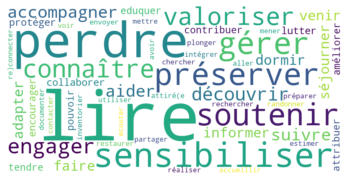

In [ ]:
makeImage(catGramm["http://pyrenees-parcnational.fr"] ['VERB'])

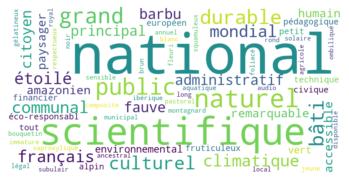

In [ ]:
makeImage(catGramm["http://pyrenees-parcnational.fr"] ['ADJ'])

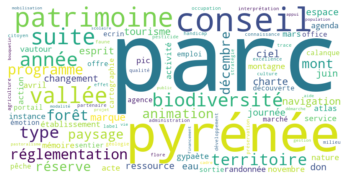

In [ ]:
makeImage(catGramm["http://pyrenees-parcnational.fr"] ['NOUN'])